In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [91]:
df=pd.read_excel('./../myproj/Survey.xlsx',nrows=830)
df.head()

,Timestamp,Which age group you belong to?,Location(From which state you are?),Is it difficult to get essentials(food/medicine)?,What is your gender?,How you ever felt symptoms of COVID?,Do you have any of the following conditions?,During the lockdown have you been doing more household work?,Have you or anyone you know have corona virus/recovered from COVID/been tested for COVID?,How often do you use masks/hand sanitizers(per day)?,...,"Over the last 2 weeks, how often have you been bothered by being so restless that it is hard to sit still?","Over the last 2 weeks, how often have you been bothered by trouble relaxing?","Over the last 2 weeks, how often have you been bothered by becoming easily an0yed or irritable?","Over the last 2 weeks, how often have you been bothered by feeling afraid as if something awful might happen?",Anxiety Numerical,Level Of Anxiety,Immunity,Unnamed: 36,Unnamed: 37,Unnamed: 38
0,2020-06-19 13:39:55.750,2,1,0,1,0,0,1,1,0,...,0,0,1,0,2,0,1,NaN,NaN,NaN
1,2020-06-19 13:40:56.063,2,1,0,1,0,0,0,0,0,...,1,1,0,1,5,1,0,NaN,NaN,NaN
2,2020-06-19 13:42:22.938,2,1,0,1,0,0,1,0,0,...,0,1,2,1,10,2,1,NaN,NaN,NaN
3,2020-06-19 13:51:35.532,2,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,NaN,NaN,NaN
4,2020-06-19 13:51:44.612,2,1,0,1,0,0,0,1,1,...,0,0,0,1,1,0,1,NaN,NaN,NaN


In [92]:
df=df.loc[df['Which age group you belong to?']==2]
df=df.loc[df['Have you felt frustrated by having your activities, major life events or opportunities affected by the virus? ']!=1]

In [93]:
X=df[[ 'What is your gender?',
       'During the lockdown have you been doing more household work?',
       'Have you or anyone you know have corona virus/recovered from COVID/been tested for COVID? ',
       'How often do you use masks/hand sanitizers(per day)?',
       'Do you feel like you have wasted your time during the lock down or have you ever felt pressurized by your peer’s accomplishments during the lock down?',
       'Are you in a containment zone? ',
       'Do you have children less than 3 yrs, or elders 65+ at your house?',
       'Have you ever felt afraid or anxious to go to hospital during this pandemic?',
       'Has your sleep cycle changed drastically?',
       'Have you felt frustrated by having your activities, major life events or opportunities affected by the virus? ',
       'Do you have online classes/assignments/assessments/tests? ',
       'Have you taken any medication to prevent corona(Chloroquine or kabasura kudineer) or any medication to increase your immunity?',
       'Have you been affected by not being able to visit religious places?'
      ]]

In [94]:
y=df['Level Of Anxiety ']

In [95]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [96]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

[Text(156.19816656769598, 209.6742857142857, 'X[5] <= 0.5\ngini = 0.655\nsamples = 345\nvalue = [157, 114, 55, 19]'),
 Text(65.70748218527316, 194.14285714285714, 'X[10] <= 0.5\ngini = 0.553\nsamples = 193\nvalue = [115, 56, 16, 6]'),
 Text(29.026603325415678, 178.61142857142858, 'X[12] <= 0.5\ngini = 0.375\nsamples = 80\nvalue = [60, 20, 0, 0]'),
 Text(15.109738717339669, 163.07999999999998, 'X[0] <= 0.5\ngini = 0.305\nsamples = 64\nvalue = [52, 12, 0, 0]'),
 Text(3.180997624703088, 147.54857142857142, 'X[9] <= 0.5\ngini = 0.133\nsamples = 28\nvalue = [26, 2, 0, 0]'),
 Text(1.590498812351544, 132.01714285714286, 'gini = 0.0\nsamples = 15\nvalue = [15, 0, 0, 0]'),
 Text(4.771496437054632, 132.01714285714286, 'X[13] <= 0.5\ngini = 0.26\nsamples = 13\nvalue = [11, 2, 0, 0]'),
 Text(3.180997624703088, 116.48571428571428, 'gini = 0.0\nsamples = 7\nvalue = [7, 0, 0, 0]'),
 Text(6.361995249406176, 116.48571428571428, 'X[6] <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2, 0, 0]'),
 Text(4.77

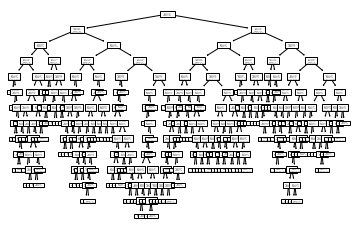

In [26]:
tree.plot_tree(clf)

In [97]:
y_pred=clf.predict(X_test)

In [98]:
y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 0], dtype=int64)

In [99]:
y_test

485    0
315    0
772    0
56     0
94     0
237    0
663    1
568    0
781    0
797    0
747    0
295    2
815    1
758    1
454    1
501    1
Name: Level Of Anxiety , dtype: int64

In [100]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.3125

In [92]:
feature_name=X.columns
label=['0','1','2','3']

In [95]:
import graphviz
ot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=feature_name,  
                      class_names=label,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

[Text(176.42756324900134, 210.645, 'X[5] <= 0.5\ngini = 0.655\nsamples = 345\nvalue = [157, 114, 55, 19]'),
 Text(87.99087882822904, 197.055, 'X[10] <= 0.5\ngini = 0.553\nsamples = 193\nvalue = [115, 56, 16, 6]'),
 Text(49.15006657789614, 183.465, 'X[14] <= 0.5\ngini = 0.375\nsamples = 80\nvalue = [60, 20, 0, 0]'),
 Text(28.75446071904128, 169.875, 'X[9] <= 0.5\ngini = 0.305\nsamples = 64\nvalue = [52, 12, 0, 0]'),
 Text(13.37416777629827, 156.285, 'X[8] <= 0.5\ngini = 0.202\nsamples = 35\nvalue = [31, 4, 0, 0]'),
 Text(11.590945406125167, 142.695, 'X[6] <= 0.5\ngini = 0.278\nsamples = 24\nvalue = [20, 4, 0, 0]'),
 Text(9.807723035952066, 129.10500000000002, 'X[4] <= 0.5\ngini = 0.36\nsamples = 17\nvalue = [13, 4, 0, 0]'),
 Text(3.5664447403462054, 115.515, 'X[3] <= 0.5\ngini = 0.198\nsamples = 9\nvalue = [8, 1, 0, 0]'),
 Text(1.7832223701731027, 101.925, 'gini = 0.0\nsamples = 7\nvalue = [7, 0, 0, 0]'),
 Text(5.349667110519308, 101.925, 'X[13] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = 

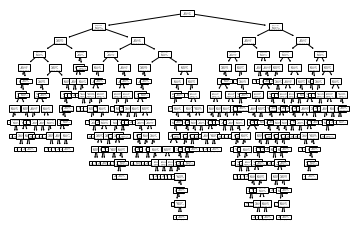

In [96]:
tree.plot_tree(clf) 

In [104]:
from sklearn.externals.six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [120]:
df=pd.read_excel('./../myproj/Survey.xlsx',nrows=830)

df=df.loc[df['Which age group you belong to?']==2]
df=df.loc[df['Level Of Anxiety ']==3]
df.shape

(24, 39)

In [121]:
X=df[[
       'What is your gender?',
       'During the lockdown have you been doing more household work?',
       'Have you or anyone you know have corona virus/recovered from COVID/been tested for COVID? ',
       'How often do you use masks/hand sanitizers(per day)?',
       'Do you feel like you have wasted your time during the lock down or have you ever felt pressurized by your peer’s accomplishments during the lock down?',
       'Are you in a containment zone? ',
       'Do you have children less than 3 yrs, or elders 65+ at your house?',
       'Have you ever felt afraid or anxious to go to hospital during this pandemic?',
       'Has your sleep cycle changed drastically?',
       'Have you felt frustrated by having your activities, major life events or opportunities affected by the virus? ',
       'Do you have online classes/assignments/assessments/tests? ',
       'Have you taken any medication to prevent corona(Chloroquine or kabasura kudineer) or any medication to increase your immunity?',
       'Have you been affected by not being able to visit religious places?'
      ]]

In [122]:
y=df['Level Of Anxiety ']
y.unique()

array([3], dtype=int64)

In [123]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [124]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [125]:
y_pred=clf.predict(X_test)

In [126]:
y_pred,y_test

(array([3, 3, 3, 3, 3, 3, 3, 3], dtype=int64),
 173    3
 433    3
 10     3
 439    3
 277    3
 180    3
 355    3
 31     3
 Name: Level Of Anxiety , dtype: int64)

In [127]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0